In [51]:
from qiskit import *
import numpy as np
import time
from qiskit import Aer, QuantumRegister
from multiprocessing import Pool
from joblib import Parallel, delayed
from qiskit.compiler import transpile

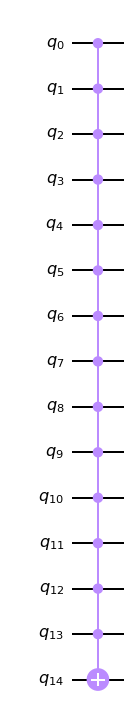

In [29]:
n = 15
N = 2**(n-1)
qc = QuantumCircuit(n)
qc.mct(list(np.arange(0,n-1,1)), n-1)
qc.draw('mpl')

In [31]:
shots = 1
simulator = Aer.get_backend('qasm_simulator')
def func(i,n,N):
    x = bin(i)[2:].zfill(n-1)
    circuit = QuantumCircuit(n, 1)
    for index, j in enumerate(x):
        if j == '1':
            circuit.x(index)
    circuit = circuit.compose(qc)
    circuit.measure(n-1, 0)
    res = execute(circuit,backend=simulator, shots=shots).result()
    counts = res.get_counts()
    s = int(list(counts.keys())[0])
    print(s)
    if i != N-1:
        assert(s == 0)
    else:
        assert(s == 1)
    return s

res = Parallel(n_jobs=2)(delayed(func)(i,n,N) for i in range(N))

0
1 0
0
4 0
0
5 0
0
7 0
0
9 0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


KeyboardInterrupt: 

In [37]:
c = QuantumRegister(14, 'c')
t = QuantumRegister(1,'t')
a = QuantumRegister(5, 'a')

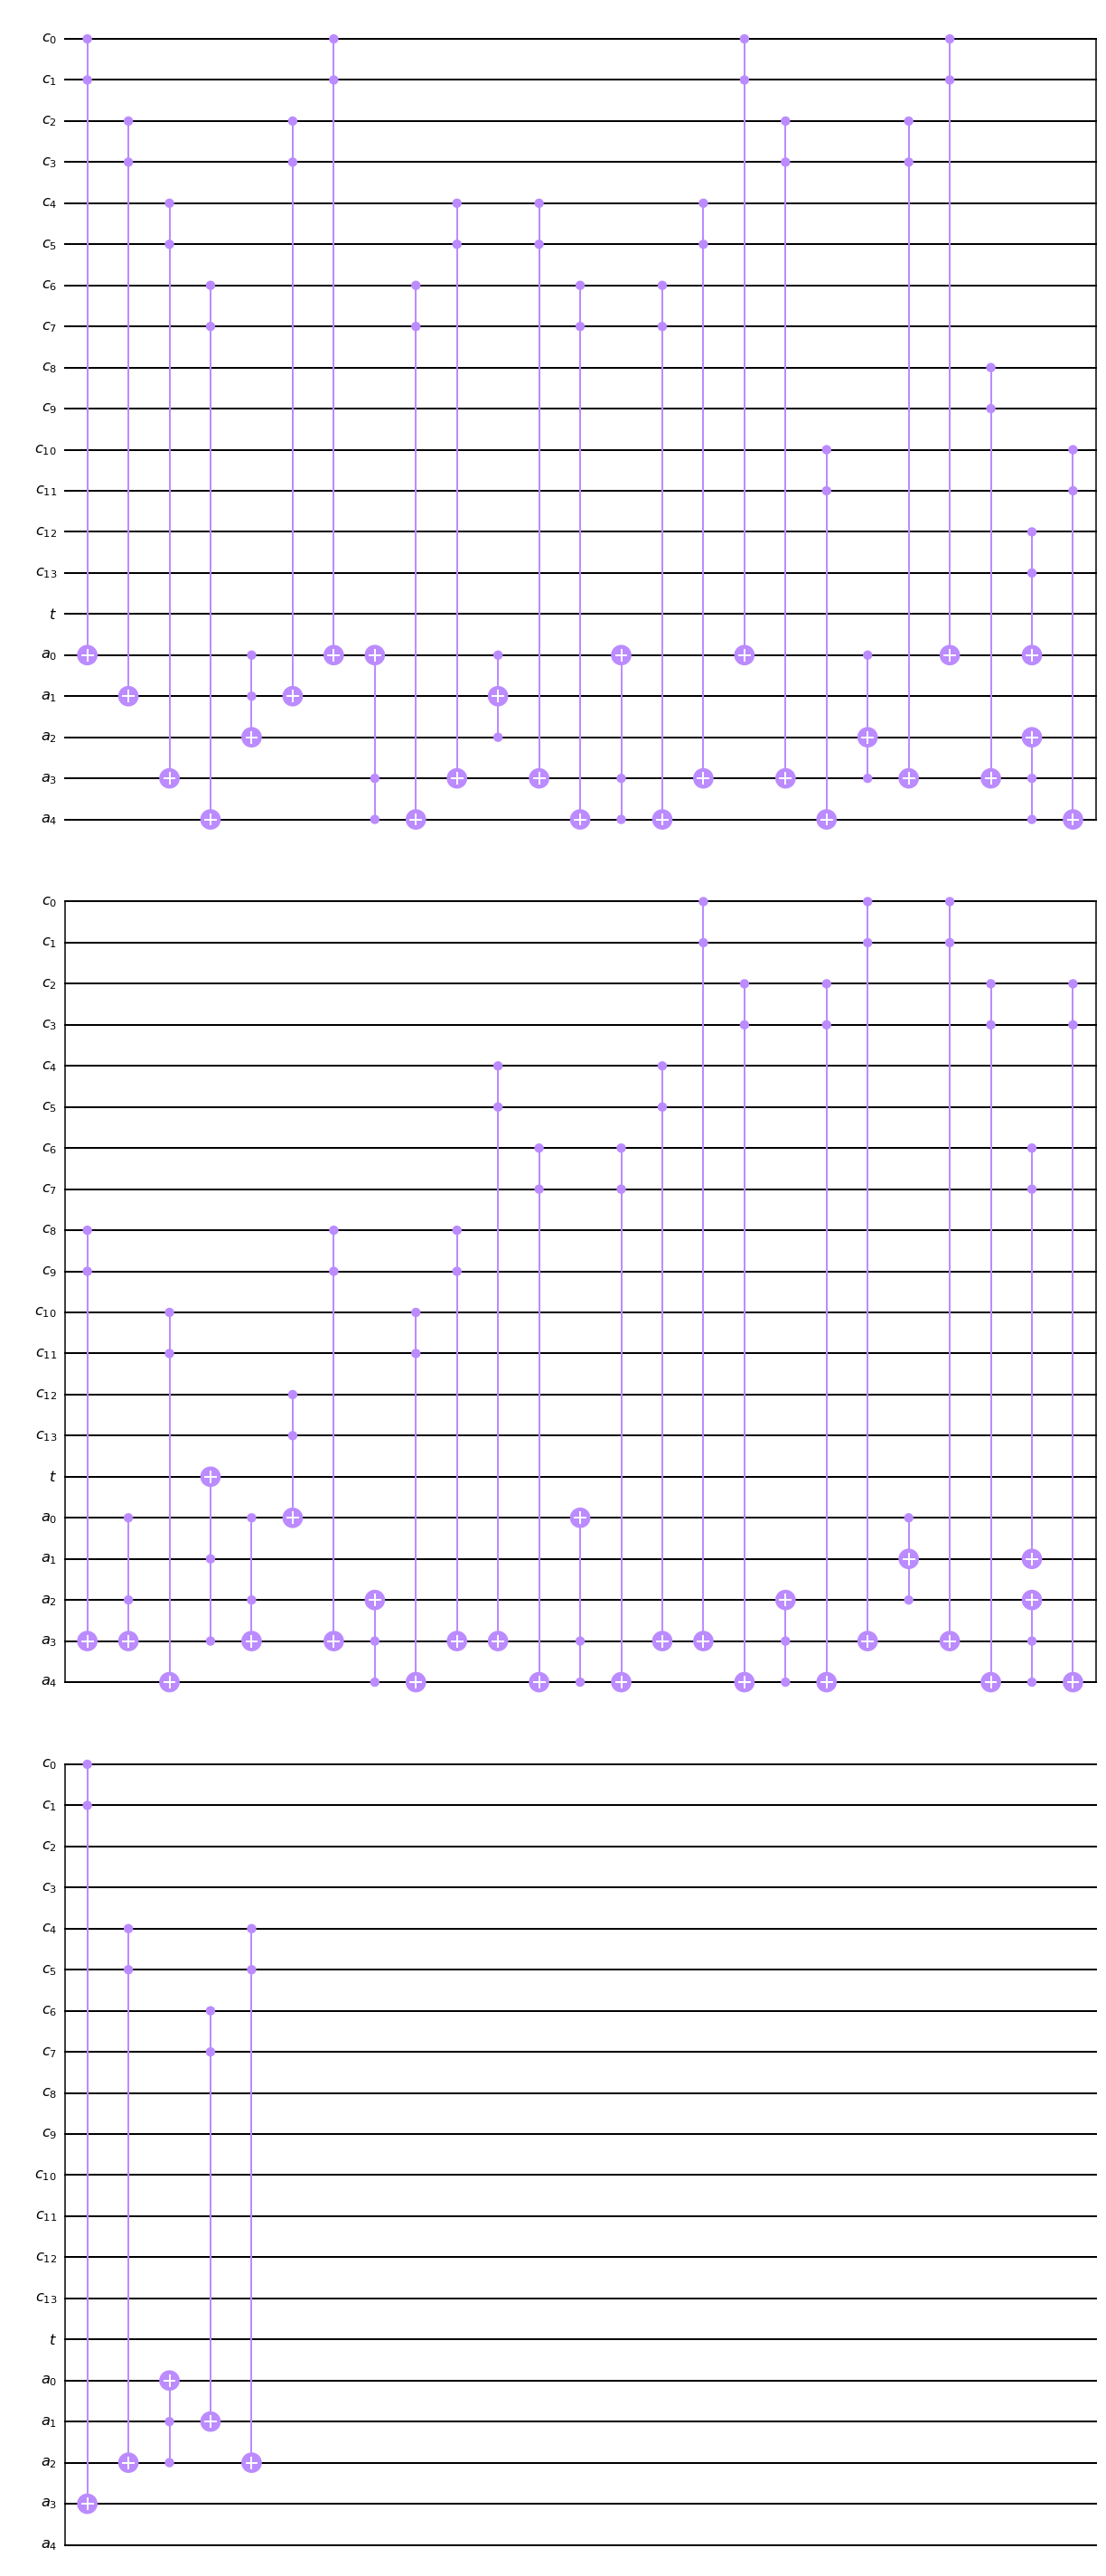

In [143]:
qc = QuantumCircuit(c, t,anc)

qc.ccx(c[0], c[1], a[0])
qc.ccx(c[2], c[3], a[1])
qc.ccx(a[0], a[1], a[2])
qc.ccx(c[2], c[3], a[1])
qc.ccx(c[0], c[1], a[0])

# qc.barrier()

# a2 = c0 c1 c2 c3

qc.ccx(c[4], c[5], a[3])
qc.ccx(c[6], c[7], a[4])
qc.ccx(a[3], a[4], a[0])
qc.ccx(c[6], c[7], a[4])
qc.ccx(c[4], c[5], a[3])
# a0 = c4 c5 c6 c7

# qc.barrier()

qc.ccx(a[0], a[2], a[1])
# a1 = c 0-7

# qc.barrier()

qc.ccx(c[4], c[5], a[3])
qc.ccx(c[6], c[7], a[4])
qc.ccx(a[3], a[4], a[0]) # a0 is free here
qc.ccx(c[6], c[7], a[4])
qc.ccx(c[4], c[5], a[3])

# qc.barrier()

qc.ccx(c[0], c[1], a[0])
qc.ccx(c[2], c[3], a[3])
qc.ccx(a[0], a[3], a[2])
qc.ccx(c[2], c[3], a[3])
qc.ccx(c[0], c[1], a[0])

# qc.barrier()

qc.ccx(c[8], c[9], a[3])
qc.ccx(c[10], c[11], a[4])
qc.ccx(a[3], a[4], a[2])
qc.ccx(c[10], c[11], a[4])
qc.ccx(c[8], c[9], a[3])

# qc.barrier()

qc.ccx(c[12], c[13], a[0])
qc.ccx(a[0],a[2], a[3])
qc.ccx(a[3],a[1],t)
qc.ccx(a[0],a[2], a[3])
qc.ccx(c[12], c[13], a[0])

# qc.barrier()

qc.ccx(c[8], c[9], a[3])
qc.ccx(c[10], c[11], a[4])
qc.ccx(a[3], a[4], a[2])
qc.ccx(c[10], c[11], a[4])
qc.ccx(c[8], c[9], a[3])

# qc.barrier()

qc.ccx(c[4], c[5], a[3])
qc.ccx(c[6], c[7], a[4])
qc.ccx(a[3], a[4], a[0])
qc.ccx(c[6], c[7], a[4])
qc.ccx(c[4], c[5], a[3])

# qc.barrier()

qc.ccx(c[0], c[1], a[3])
qc.ccx(c[2], c[3], a[4])
qc.ccx(a[3], a[4], a[2])
qc.ccx(c[2], c[3], a[4])
qc.ccx(c[0], c[1], a[3])

# qc.barrier()
qc.ccx(a[0],a[2], a[1])

# qc.barrier()

qc.ccx(c[0], c[1], a[3])
qc.ccx(c[2], c[3], a[4])
qc.ccx(a[3], a[4], a[2])
qc.ccx(c[2], c[3], a[4])
qc.ccx(c[0], c[1], a[3])

# qc.barrier()

qc.ccx(c[4], c[5], a[2])
qc.ccx(c[6], c[7], a[1])
qc.ccx(a[2], a[1], a[0])
qc.ccx(c[6], c[7], a[1])
qc.ccx(c[4], c[5], a[2])

qc.draw('mpl')

In [138]:
qc.depth()

31

In [140]:
shots = 1
simulator = Aer.get_backend('qasm_simulator')
for i in range(N):
    x = bin(i)[2:].zfill(n-1)
    circuit = QuantumCircuit(20)
    for index, j in enumerate(x):
        if j == '1':
            circuit.x(index)
    circuit = circuit.compose(qc)
    circuit.measure_all()
    res = execute(circuit,backend=simulator, shots=shots).result()
    counts = res.get_counts()
    s = list(counts.keys())[0]
    expected = '000000' + x[::-1]
    print(i, s)
    if i != N-1:
        assert(s == expected)
    else:
        expected = '000001' + x
        assert(s == expected)
    

16383 00000111111111111111


In [150]:
circuit = qc.decompose()

In [151]:
print(circuit.depth())
print(circuit.count_ops())

303
OrderedDict([('cx', 342), ('t', 228), ('tdg', 171), ('h', 114)])


In [155]:
circuit.qasm(formatted=True, filename='toff14.qasm')

OPENQASM 2.0;
include "qelib1.inc";
qreg c[14];
qreg t[1];
qreg a[5];
h t[0];
h a[0];
cx c[1],a[0];
tdg a[0];
cx c[0],a[0];
t a[0];
cx c[1],a[0];
t c[1];
tdg a[0];
cx c[0],a[0];
cx c[0],c[1];
t c[0];
tdg c[1];
cx c[0],c[1];
t a[0];
h a[0];
h a[1];
cx c[3],a[1];
tdg a[1];
cx c[2],a[1];
t a[1];
cx c[3],a[1];
t c[3];
tdg a[1];
cx c[2],a[1];
cx c[2],c[3];
t c[2];
tdg c[3];
cx c[2],c[3];
t a[1];
h a[1];
h a[2];
cx a[1],a[2];
tdg a[2];
cx a[0],a[2];
t a[2];
cx a[1],a[2];
t a[1];
tdg a[2];
cx a[0],a[2];
cx a[0],a[1];
t a[0];
tdg a[1];
cx a[0],a[1];
h a[0];
cx c[1],a[0];
tdg a[0];
cx c[0],a[0];
t a[0];
cx c[1],a[0];
t c[1];
tdg a[0];
cx c[0],a[0];
cx c[0],c[1];
t c[0];
tdg c[1];
cx c[0],c[1];
t a[0];
h a[0];
h a[0];
h a[1];
cx c[3],a[1];
tdg a[1];
cx c[2],a[1];
t a[1];
cx c[3],a[1];
t c[3];
tdg a[1];
cx c[2],a[1];
cx c[2],c[3];
t c[2];
tdg c[3];
cx c[2],c[3];
t a[1];
h a[1];
h a[1];
t a[2];
h a[2];
cx a[2],a[1];
tdg a[1];
h a[3];
cx c[5],a[3];
tdg a[3];
cx c[4],a[3];
t a[3];
cx c[5],a[3];
t c[